# Task 1: Data Understanding

### 1.1 Project Rationale

This project focuses on building an end-to-end machine learning pipeline to classify the type of drug a patient should be prescribed, based on their medical attributes. The dataset contains anonymized patient information and the corresponding drug type that was prescribed.

The goal is to preprocess the data, explore it visually and statistically, build a classification model, and evaluate its performance using appropriate metrics.



### Features

* Age: Age of the patient (in years)	
* Sex:	Gender of the patient (F or M)	
* BP :Blood pressure levels (LOW, NORMAL, HIGH)	
* Cholesterol: Cholesterol level (NORMAL or HIGH)
* Na_to_K: Sodium to Potassium ratio in blood 

### Target Variable 

* Drug: Type of Drug prescribed to patient

### Prediction Task

This is a multiclass classification problem, where the objective is to accurately predict the type of drug (Drug) a patient should be prescribed, based on the input features such as age, sex, blood pressure, cholesterol level, and sodium-to-potassium ratio in blood.

### 1.2 Load Dataset

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import OneHotEncoder

In [166]:
df = pd.read_csv("drug200.csv")            # Loading datset 
df.head(10)                                # Verify if dataset is loaded properly

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


### 1.3 Explore the Data (EDA)

#### 1.3.1 Data Overview

In [167]:
# Check the number of observations and features
print(f"Number of rows (observations): {df.shape[0]}")   # As the return type of shape is tuple, calling rows and columns their index
print(f"Number of columns (features): {df.shape[1]}")

Number of rows (observations): 200
Number of columns (features): 6


In [168]:
# 2. Identify the target variable

print(f"\nTarget variable for this supervised learning task: '{df['Drug']}'")


Target variable for this supervised learning task: '0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object'


In [169]:
# Identify categorical columns (potential label columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


Checking Distribution for Categorical Label : Sex

Column: 'Sex'
Sex
M    104
F     96
Name: count, dtype: int64
Number of unique classes in 'Sex': 2


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_3936\1375213469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


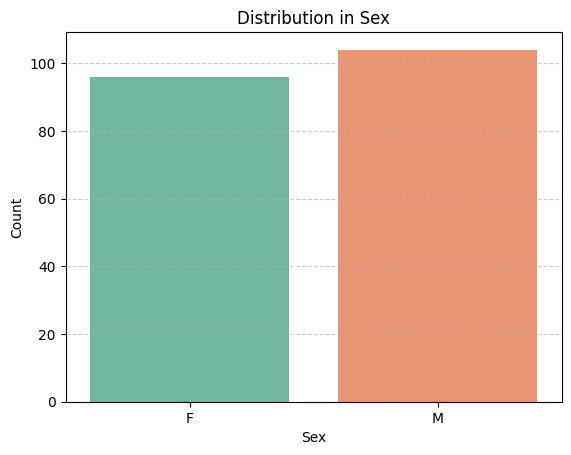

In [170]:
print("Column: 'Sex'")
print(df['Sex'].value_counts())
print(f"Number of unique classes in 'Sex': {df['Sex'].nunique()}")

# Plot
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Distribution in Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Checking Distribution for Categorical Label : Blood Pressure

Column: 'BP'
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Number of unique classes in 'BP': 3


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_3936\2948710817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=df, palette='Set2')


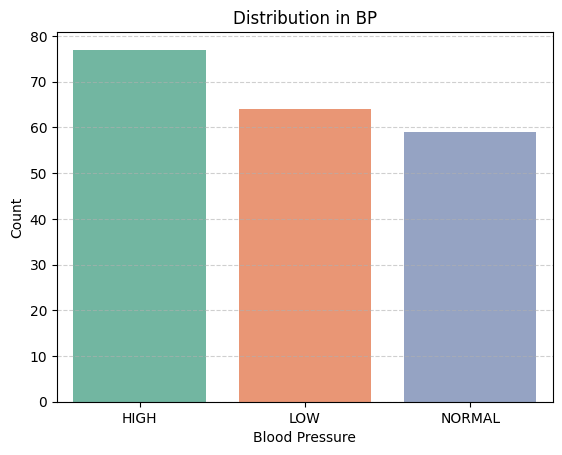

In [171]:
print("Column: 'BP'")
print(df['BP'].value_counts())
print(f"Number of unique classes in 'BP': {df['BP'].nunique()}")

# Plot
sns.countplot(x='BP', data=df, palette='Set2')
plt.title('Distribution in BP')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Checking distribution for Categorical Label : Cholestrol

C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_3936\1280258182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=df, palette='Set2')


Column: 'Cholesterol'
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Number of unique classes in 'Cholesterol': 2


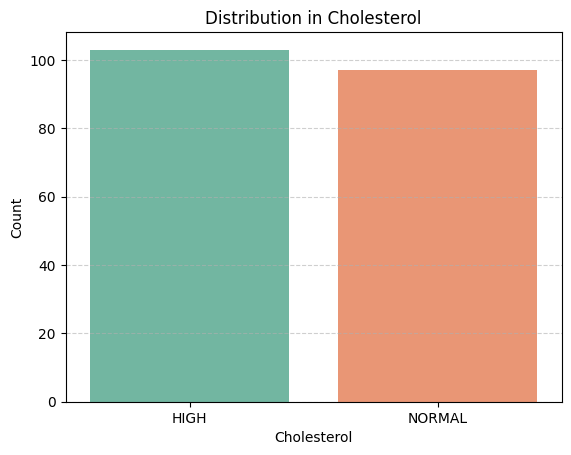

In [172]:
print("Column: 'Cholesterol'")
print(df['Cholesterol'].value_counts())
print(f"Number of unique classes in 'Cholesterol': {df['Cholesterol'].nunique()}")

# Plot
sns.countplot(x='Cholesterol', data=df, palette='Set2')
plt.title('Distribution in Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Checking Distribution for Categorical Label : Drug

Column: 'Drug' (Target)
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Number of unique classes in 'Drug': 5


C:\Users\SAAD KHAN\AppData\Local\Temp\ipykernel_3936\2408213865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=df, palette='Set2')


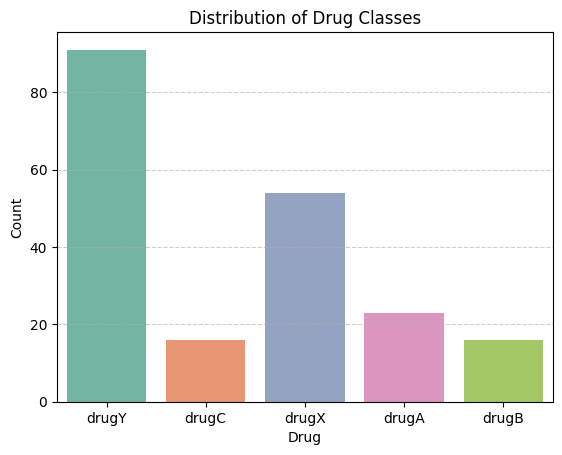

In [173]:
print("Column: 'Drug' (Target)")
print(df['Drug'].value_counts())
print(f"Number of unique classes in 'Drug': {df['Drug'].nunique()}")

# Plot
sns.countplot(x='Drug', data=df, palette='Set2')
plt.title('Distribution of Drug Classes')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 1.3.2 Feature Analysis

Descriptive statistics for numerical columns 

In [174]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Checking Distribution : Plotting Histogram for Age 

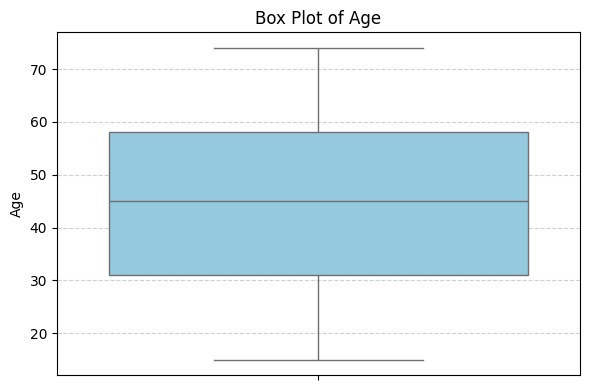

In [175]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Age', data=df, color='skyblue')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Happy to see no outliers. 

Checking Distribution : Plotting Histogram for Na to K ratio

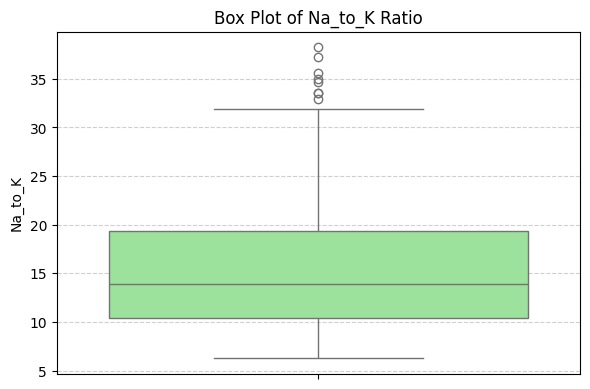

In [176]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='Na_to_K', data=df, color='lightgreen')
plt.title('Box Plot of Na_to_K Ratio')
plt.ylabel('Na_to_K')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [177]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)]

# Display count and the actual outlier rows
print(f"Number of outliers in 'Na_to_K': {outliers.shape[0]}")
print("\nOutlier rows:")
print(outliers)


Number of outliers in 'Na_to_K': 8

Outlier rows:
     Age Sex    BP Cholesterol  Na_to_K   Drug
24    33   F   LOW        HIGH   33.486  drugY
96    58   F   LOW        HIGH   38.247  drugY
98    20   M  HIGH      NORMAL   35.639  drugY
128   47   M   LOW      NORMAL   33.542  drugY
131   52   M   LOW      NORMAL   32.922  drugY
184   18   F  HIGH        HIGH   37.188  drugY
188   65   M  HIGH      NORMAL   34.997  drugY
194   46   F  HIGH        HIGH   34.686  drugY


Reason : Why I am keeping those outliers 

* All 8 outliers are associated with a single class: drugY.This suggests they carry critical class-specific information.

* Removing them would make it harder for your model to learn patterns that distinguish drugY from other drug types.

In future I plan to implement Multiple Classification Models: 

* Logistic Regression

* k-NN

* Support Vector Machine

* Random Forest

* XGBoost


Out of which distance-based models (Logistic Regression, k-NN, SVM) is sensitive to outliers, but this can be handled by scaling the data (e.g., RobustScaler).

Whereas, Random Forest and XGBoost are robust to outliers.

Mathematically its 8 out of 200 rows (i.e., 4%) are outliers.

Anyway I will be comparing models with 5 different ML Algorithm 

Removing them would reduce classifier's ability to detect high Na_to_K scenarios linked with drugY.Which I don't want Hence there are more pros then cons I see in it moving ahead with decision of keeping the outliers. 

#### 1.3.3 Exploring Relationship

1. Drug vs. Sex

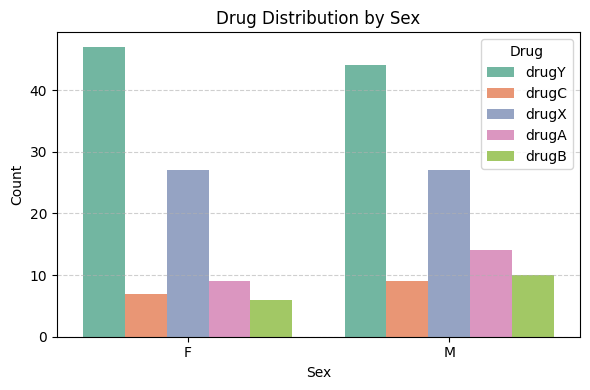

In [178]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Drug', data=df, palette='Set2')
plt.title('Drug Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


2. Drug vs. BP (Blood Pressure)

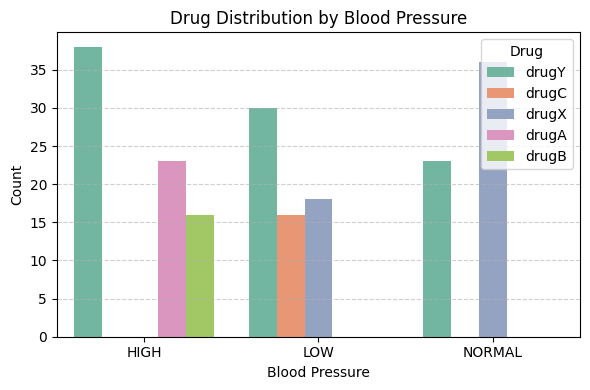

In [179]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BP', hue='Drug', data=df, palette='Set2')
plt.title('Drug Distribution by Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


3. Drug vs. Cholesterol

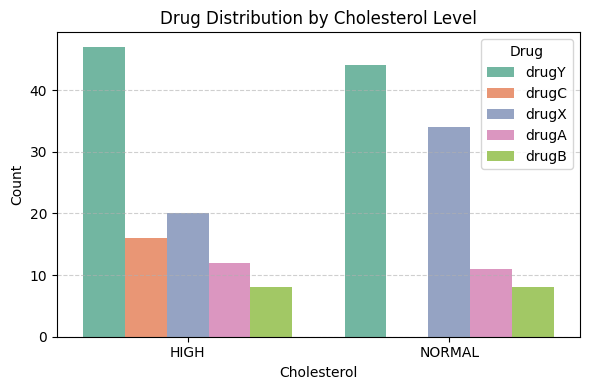

In [180]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cholesterol', hue='Drug', data=df, palette='Set2')
plt.title('Drug Distribution by Cholesterol Level')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend(title='Drug')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 1.3.4 Data Quality Check

Check for Missing or Null Values

In [181]:
# Check for missing/null values in each column
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Check for Data Types (To Ensure Consistency)

In [182]:
# Data types of all columns
print("\nData types of columns:\n")
print(df.dtypes)


Data types of columns:

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


Checking for Out-of-Range values

For Age


In [183]:
print("\nCheck for unusual Age values:")
print(f"Min age: {df['Age'].min()}")
print(f"Max age: {df['Age'].max()}")

print(df[df['Age'] < 0])  # Invalid
print(df[df['Age'] > 120])  # Potentially suspicious



Check for unusual Age values:
Min age: 15
Max age: 74
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []


For Na_to_K

In [184]:
print("\nCheck for unusual Na_to_K values:")
print(f"Min Na_to_K: {df['Na_to_K'].min()}")
print(f"Max Na_to_K: {df['Na_to_K'].max()}")


print(df[df['Na_to_K'] < 0])


Check for unusual Na_to_K values:
Min Na_to_K: 6.269
Max Na_to_K: 38.247
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Na_to_K, Drug]
Index: []


 For Categorical Columns

In [185]:
# Check unique values in categorical columns
print("\nUnique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'BP':", df['BP'].unique())
print("Unique values in 'Cholesterol':", df['Cholesterol'].unique())
print("Unique values in 'Drug':", df['Drug'].unique())



Unique values in 'Sex': ['F' 'M']
Unique values in 'BP': ['HIGH' 'LOW' 'NORMAL']
Unique values in 'Cholesterol': ['HIGH' 'NORMAL']
Unique values in 'Drug': ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


#### 1.3.5 Summarise Finding

1. Data Structure & Quality

* The dataset completeness is quite good.

* No missing or null values were found in any column.

All features are within valid value ranges:

* Age ranges from reasonable values (no negatives or unrealistic ages).

* Na_to_K values are all positive and numeric.

* Categorical columns (Sex, BP, Cholesterol, Drug) contain expected values without typos or inconsistencies.

2. Target Variable: Drug

* The target variable Drug is categorical with 5 distinct classes: drugA, drugB drugY, drugX, drugC.

* Initial class distribution shows imbalance, with drugY being the most frequent class.

* This imbalance should be accounted for during model evaluation (e.g., using stratified sampling or class-weighted models).


3. Outliers

* Detected 8 outliers in the Na_to_K feature using the IQR method.

* Importantly, all outliers belong to the drugY class, indicating they may be informative rather than erroneous.

* These outliers should not be removed, as they could help the model distinguish patients likely to require drugY.


Initial Thoughts for Modeling

* Since features are a mix of categorical and numerical:

* Use one-hot encoding for categorical variables.

* Consider RobustScaler for Na_to_K due to outliers.



## Task 2: Data Preparation & Modeling

### 2.1 Splitting the data

In [186]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df.drop(['Drug'], axis=1)
y = df['Drug']

# Step 2: First split → Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# Step 3: Second split → Validation (20%) and Test (20%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Print set sizes
print(f"Training set: {X_train.shape[0]} rows")
print(f"Validation set: {X_val.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")


Training set: 120 rows
Validation set: 40 rows
Test set: 40 rows


### 2.2 Preprocessing and Feature Engineering

Cleaning : Dataset has no missing values to be treated. 

There was also an option for bin numeric features such as Age, Na to K ratio 

for eg. The age divided into 7 age categories:

Below 20 y.o.
20 - 29 y.o.
30 - 39 y.o.
40 - 49 y.o.
50 - 59 y.o.
60 - 69 y.o.
Above 70.

The Na to K ratio divided into 4 categories:

Below 10.
10 - 20.
20 - 30.
Above 30.

Reason: 

* A Na_to_K of 29.9 and 20.1 will both be labeled "20–30", though they may represent different risk levels.

* Age 49 and 40 are very different medically, but in if bin they'll be treated the same.

* Algorithms like Logistic Regression, SVM, Random Forest, XGBoost, etc., are designed to handle continuous variables directly.

* Letting models learn from the raw distribution gives them more power to discover meaningful thresholds themselves. 


### 2.2 Transformation

Encode Categorical Variables
As ML models can’t handle strings directly, so use One-Hot Encoding for:
* Sex
* BP
* Cholesterol


Feature Scaling using RobustScaler

* Used RobustScaler over Standard Scalar to reduce the impact of outliers, especially in Na_to_K.

`ColumnTransformer` to ensure model is robust and maintainable.

In [187]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), ['Age', 'Na_to_K']),
        ('cat', OneHotEncoder(drop='first'), ['Sex', 'BP', 'Cholesterol'])
    ]
)



### 2.3 Feature Encoding/Representation

Core Reason:
fit() learns preprocessing rules (e.g., scaling factors, category mappings) from the training data only.

transform() applies those rules to any dataset.

In [188]:
# 2. Fit on train and transform all sets
X_train_prepared = preprocessor.fit_transform(X_train)
X_val_prepared = preprocessor.transform(X_val)
X_test_prepared = preprocessor.transform(X_test)



### 2.4 Feature Selection

In our case we have 5 features and all poses distint charactertics and are important in predicting the drug type. 
Hence no need to perform feature selection or dimensionality reduction


### 2.5 Model Training
### 1. Logistic Regression


Validation Set Performance:
              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.60      1.00      0.75         3
       drugX       0.92      1.00      0.96        11
       drugY       1.00      0.61      0.76        18

    accuracy                           0.82        40
   macro avg       0.78      0.92      0.82        40
weighted avg       0.88      0.82      0.82        40



c:\Users\SAAD KHAN\anaconda3\envs\data_analytics\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


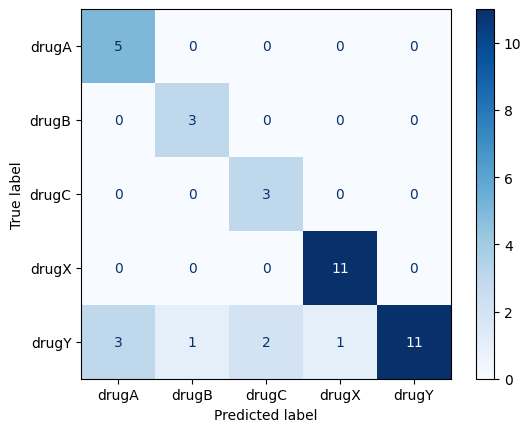

In [189]:
# Train Logistic Regression
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Optional
)

log_reg.fit(X_train_prepared, y_train)


# 4. Evaluate on Validation Set
y_test_pred = log_reg.predict(X_test_prepared)
print("Validation Set Performance:")
print(classification_report(y_test, y_test_pred))


# 6. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.show()

### 2. Random Forest

#### Random Forest Key Settings

`n_estimators`=100: Number of trees (default). Increase (e.g., 200-500) for better accuracy (slower).

`class_weight`='balanced': Adjusts for class imbalance (check y_train.value_counts()).

`max_depth`=None: Trees grow fully (limit e.g., max_depth=10 to prevent overfitting).

Defaults:

`criterion`='gini' (faster than 'entropy').

min_samples_split=2, min_samples_leaf=1 (flexible trees; tune later if overfitting).



Random Forest - Validation Set Performance:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.75      1.00      0.86         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.95      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



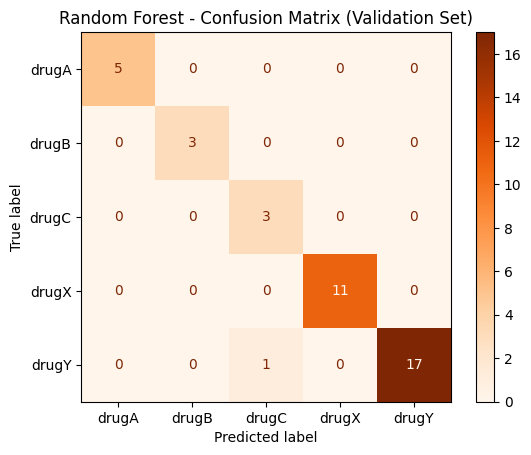

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


rf = RandomForestClassifier(
    n_estimators=100,        # Default=100; good for starting (more = better but slower)
    criterion='gini',        # Default ('gini' or 'entropy' for information gain)
    max_depth=None,          # Default=None (nodes expand until pure or min_samples_split)
    min_samples_split=2,     # Default=2 (smallest possible for max flexibility)
    min_samples_leaf=1,      # Default=1 (smallest possible)
    class_weight='balanced', # Adjusts for class imbalance (critical if imbalance exists)
    random_state=42,         # Reproducibility
)


rf.fit(X_train_prepared, y_train)

# Predict on validation set
y_test_pred = rf.predict(X_test_prepared)

# Evaluate
print("Random Forest - Validation Set Performance:")
print(classification_report(y_test, y_test_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Oranges')
plt.title("Random Forest - Confusion Matrix (Validation Set)")
plt.show()

### 3. SVM

SVM - Validation Set Performance:
              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.60      1.00      0.75         3
       drugX       0.92      1.00      0.96        11
       drugY       1.00      0.67      0.80        18

    accuracy                           0.85        40
   macro avg       0.80      0.93      0.84        40
weighted avg       0.89      0.85      0.85        40



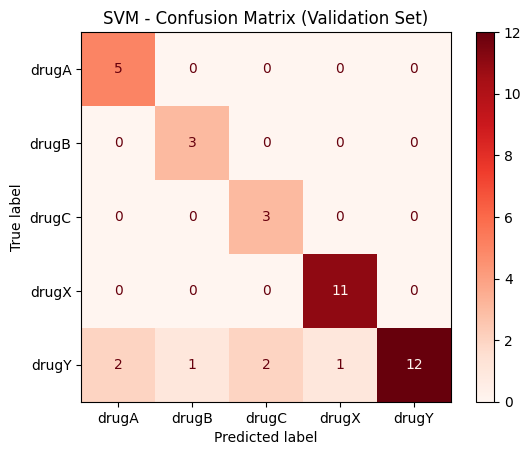

In [191]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
 

# Initialize and train the model
svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42,
    probability=True
)
svm.fit(X_train_prepared, y_train)

# Predict on validation set
y_test_pred = svm.predict(X_test_prepared)

# Evaluate
print("SVM - Validation Set Performance:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Reds')  # Red to distinguish from other models
plt.title("SVM - Confusion Matrix (Validation Set)")
plt.show()

### 4. K-nearest neighbor algorithm (KNN)

KNN - Validation Set Performance:
              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.67      0.67      0.67         3
       drugC       0.75      1.00      0.86         3
       drugX       0.83      0.91      0.87        11
       drugY       1.00      0.72      0.84        18

    accuracy                           0.82        40
   macro avg       0.78      0.86      0.80        40
weighted avg       0.86      0.82      0.83        40



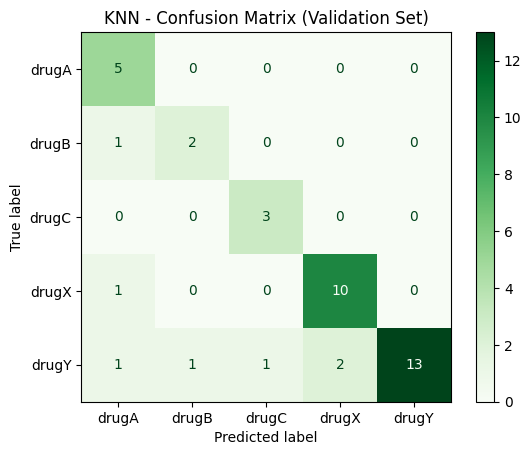

In [192]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_prepared, y_train)

# Predict on validation set
y_test_pred = knn.predict(X_test_prepared)

# Evaluate
print("KNN - Validation Set Performance:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Greens')
plt.title("KNN - Confusion Matrix (Validation Set)")
plt.show()

### 5. Decision Tree

Decision Tree - Validation Set Performance:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.75      1.00      0.86         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.95      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



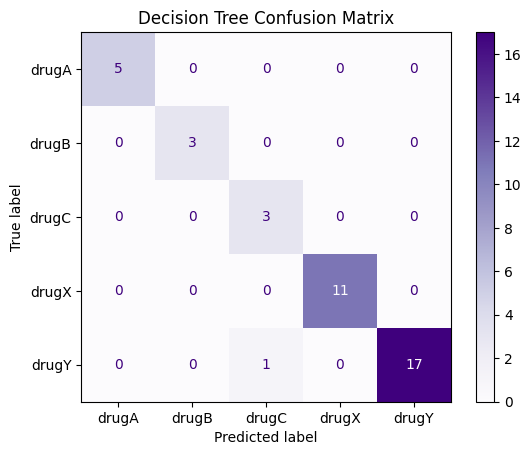

In [194]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Initialize Decision Tree with balanced class weights
dt = DecisionTreeClassifier(
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)
# Train the model
dt.fit(X_train_prepared, y_train)
# Predictions
y_test_pred = dt.predict(X_test_prepared)
# Evaluation
print("Decision Tree - Validation Set Performance:")
print(classification_report(y_test, y_test_pred))

#Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.show()


### Task 3. Evaluation 

3.1 Select Evaluation Metrics

#### Reason for Selecting F1 Score as the Evaluation Metric

From the EDA performed previously, we observed class imbalance in Drug Types, as shown in the figure below. Therefore, using accuracy is not an optimal choice for comparing all five ML models.

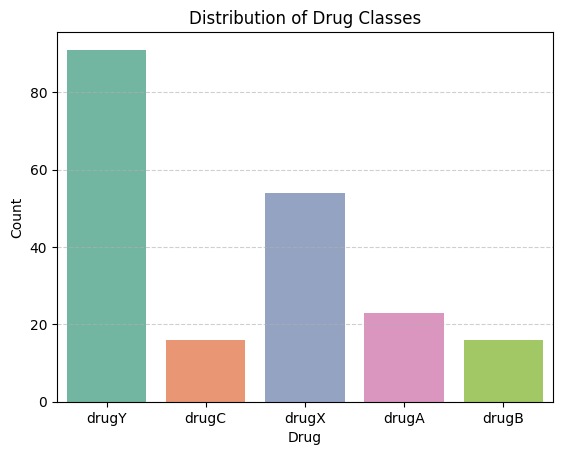

To decide which metric to consider, I reviewed several research papers on multi-class classification:

1. Lipton, Z. C., Elkan, C., & Narayanaswamy, B. (2014). *Thresholding Classifiers to Maximize F1 Score*. arXiv:1402.1892  
2. Opitz, J., & Burst, S. (2019). *Macro F1 and macro F1*. arXiv preprint arXiv:1911.03347  
3. Grandini, M., Bagli, E., & Visani, G. (2020). *Metrics for multi-class classification: an overview*. arXiv preprint arXiv:2008.05756  

Honestly speaking, I could not understand the majority of graphs and mathematical expressions. The only paper that made me feel like I understood something was:

- **Grandini, M., Bagli, E., & Visani, G. (2020)** – *Metrics for multi-class classification* (arXiv:2008.05756)

Generally, based on the formula, insights from the research papers, and watching a few YouTube videos, I found that the best solution for my use case and dataset type is using the **F1-score**. 

```python
                2
F1 score = ------------
             1     1
            --- + ---
             P     R
```

The formula for the F1-score is based on the **harmonic mean** of two crucial entities: **Precision** and **Recall**, thus providing essential insight into the model's performance. 

By the way, Thanks for providing hints at each stage. I did consider the confusion matrix, but I feel it works better for binary classification. It's more complex to interpret in the case of multi-class classification.

If you could let me know in feeback about decision good or bad that would be helpfully.   

